# ULS Risley Prism Scanner Demo

Notebook: Hannah Weiser & Sina Zumstein, 2023 - 2026

This demo scene showcases various toyblock models scanned by a risley prism scanner mounted on a UAV. 

In [2]:
import helios

## Creating the virtual scene

In [3]:
# load objs and apply transformations
groundplane = helios.ScenePart.from_obj(
    "../data/sceneparts/basic/groundplane/groundplane.obj"
).scale(70).translate([20.0, 0.0, 0.0])
cube = helios.ScenePart.from_obj("../data/sceneparts/toyblocks/cube.obj")
cube2 = helios.ScenePart.from_obj(
    "../data/sceneparts/toyblocks/cube.obj"
).scale(0.5).rotate(axis=(0.0, 0.0, 1.0), angle=45).translate([-45.0, 10.0, 10.0])
sphere = helios.ScenePart.from_obj("../data/sceneparts/toyblocks/sphere.obj").scale(0.5)
cylinder = helios.ScenePart.from_obj("../data/sceneparts/toyblocks/cylinder.obj")

# create scene
scene = helios.StaticScene(scene_parts=[groundplane, cube, cube2, sphere, cylinder])

## Platform and scanner

In [5]:
scanner = helios.scanner_from_name("livox_mid70")
platform = helios.platform_from_name("copter_linearpath")

The Livox Mid-70 is a scanner with two rotating risley prisms. For this deflector type, the scan pattern is controlled by the rotation speeds of two rotating risley prisms. This design on which the low-cost Livox scanners are based is described in detail in [Liu et al. (2022)](https://doi.org/10.1109/TMECH.2021.3058173).

For further reading on rotational risley prisms, see [Duma & Schitea (2018)](https://acad.ro/sectii2002/proceedings/doc2018-1/08.pdf).

## Survey

In [ ]:
survey = helios.Survey(scanner=scanner, platform=platform, scene=scene)

scanner_settings = helios.ScannerSettings(
    pulse_frequency=100_000 * helios.units.Hz,
    trajectory_time_interval=0.05
)

survey.add_leg(x=-80, y=-50, z=35, speed_m_s=5, scanner_settings=scanner_settings)
survey.add_leg(x=80, y=-50, z=35, speed_m_s=5, scanner_settings=scanner_settings)
survey.add_leg(x=-80, y=50, z=35, speed_m_s=5, scanner_settings=scanner_settings)
survey.add_leg(x=80, y=50, z=35, speed_m_s=5, scanner_settings=scanner_settings)


## Running the survey

In [7]:
points, trajectories = survey.run(verbosity=helios.LogVerbosity.VERBOSE, format=helios.OutputFormat.NPY)

## Visualizing the results

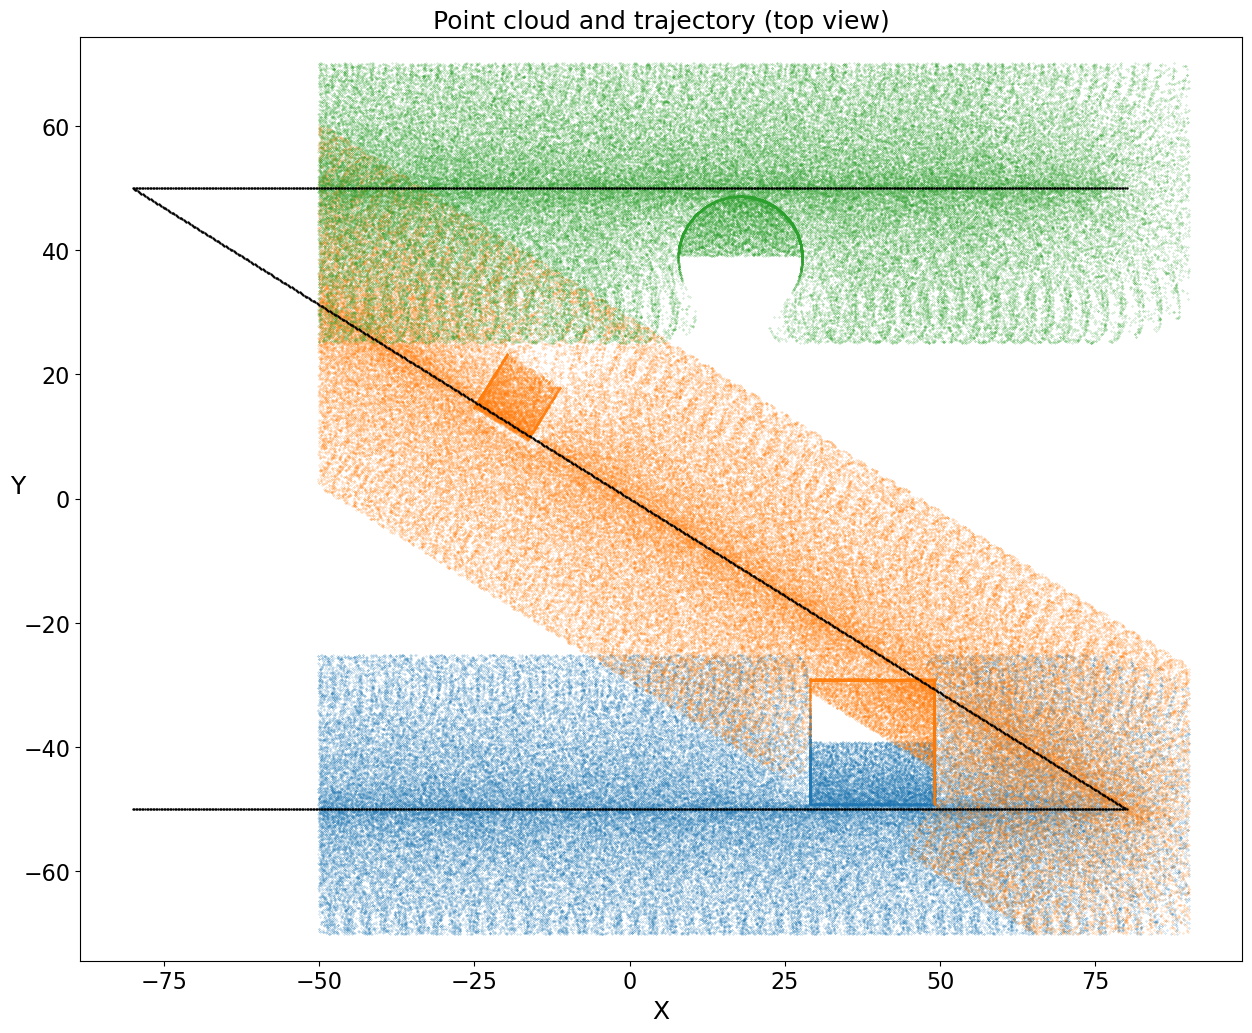

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 12))
strip_1 = points[points["point_source_id"] == 0]["position"]
strip_2 = points[points["point_source_id"] == 1]["position"]
strip_3 = points[points["point_source_id"] == 2]["position"]
traj = trajectories["position"]

# view from above, colored by strip, including trajectory - show only every 20th measurement
ax.scatter(
    strip_1[::20, 0], strip_1[::20, 1], s=0.05, alpha=0.6
)  # select X and Y coordinates
ax.scatter(strip_2[::20, 0], strip_2[::20, 1], s=0.05, alpha=0.6)
ax.scatter(strip_3[::20, 0], strip_3[::20, 1], s=0.05, alpha=0.6)
ax.scatter(traj[:, 0], traj[:, 1], s=0.5, color="black")
ax.tick_params(labelsize=16)
ax.set_xlabel("X", fontsize=18)
ax.set_ylabel("Y", fontsize=18, rotation=0)

ax.set_title("Point cloud and trajectory (top view)", fontsize=18)

plt.axis("equal")
plt.show()